In [1]:
from __future__ import print_function
from numpy.random import randn
from numpy.linalg import eigvalsh
from numpy import vstack, ones
import matplotlib.pyplot as plt
from pyriemann.estimation import Covariances
from pyriemann.utils.distance import distance_riemann
from numpy import zeros, concatenate, sin, resize, arange

In [2]:
%matplotlib inline

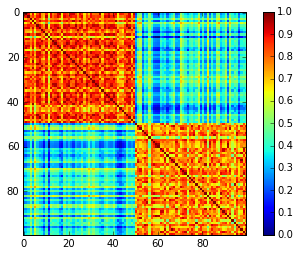

In [3]:
k, d, n = 100, 2, 20

class_1 = resize(sin(0.3*resize(arange(n), (d, n))), 
                 (k/2, d, n)) + 0.2*randn(k/2, d, n)
class_2 = resize(sin(0.1*resize(arange(n), (d, n))), 
                 (k/2, d, n)) + 0.4*randn(k/2, d, n)
X = vstack((class_1, class_2))
cov = Covariances()
S = cov.transform(X)

R = zeros(shape=(k, k))
for i in range(k):
    for j in range(i, k):
        R[i,j] = R[j,i] = distance_riemann(S[i,:,:], S[j,:,:])
G = ones(shape=(X.shape[0], X.shape[0])) - R/R.max()

plt.imshow(G, interpolation='nearest')
plt.colorbar()
plt.savefig('gram-riemann.png')

In [4]:
ev = eigvalsh(G)
print ("Min eigenvalue: %g and max eigenvalue: %g" %(ev.min(), ev.max()) )

Min eigenvalue: 0.00604144 and max eigenvalue: 59.4793
